<a href="https://colab.research.google.com/github/Karincheong/Call-For-Help-American-Sign-Language-Recognition-Using-Deep-Learning-Model/blob/main/InceptionV3_model_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Library
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras import models
import numpy as np
from glob import glob
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import keras
import pathlib
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import models
import pathlib
from tensorflow.keras import initializers
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions

**Inception V3**

In [ ]:
# set working directory
train_dir = '/content/drive/MyDrive/Call for help sign language /final_dataset/Split_sample/Train_70%'
validation_dir = '/content/drive/MyDrive/Call for help sign language /final_dataset/Split_sample/Val_20%'
test_dir = '/content/drive/MyDrive/Call for help sign language /final_dataset/Split_sample/Test_10%'

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
num_classes = 9
input_shape = (224, 224, 3)
#InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(9, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
# Print the summary of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
# Freeze the weights not updated during training
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Definedata generators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=100,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=input_shape[:2],
    batch_size=100,
    class_mode='categorical')

Found 4890 images belonging to 9 classes.
Found 1397 images belonging to 9 classes.


In [ ]:
# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size)

<ipython-input-27-66eb2cf90a43>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
48/48 [==============================] - 1081s 22s/step - loss: 2.7022 - accuracy: 0.3052 - val_loss: 1.4822 - val_accuracy: 0.4977
Epoch 2/20
48/48 [==============================] - 124s 3s/step - loss: 1.2789 - accuracy: 0.5823 - val_loss: 1.1575 - val_accuracy: 0.6138
Epoch 3/20
48/48 [==============================] - 125s 3s/step - loss: 0.9605 - accuracy: 0.6894 - val_loss: 0.8917 - val_accuracy: 0.7077
Epoch 4/20
48/48 [==============================] - 125s 3s/step - loss: 0.8084 - accuracy: 0.7290 - val_loss: 0.7502 - val_accuracy: 0.7562
Epoch 5/20
48/48 [==============================] - 125s 3s/step - loss: 0.6976 - accuracy: 0.7662 - val_loss: 0.8364 - val_accuracy: 0.7231
Epoch 6/20
48/48 [==============================] - 124s 3s/step - loss: 0.5880 - accuracy: 0.8111 - val_loss: 0.6931 - val_accuracy: 0.7731
Epoch 7/20
48/48 [==============================] - 126s 3s/step - loss: 0.5481 - accuracy: 0.8198 - val_loss: 0.6107 - val_accuracy: 0.7977
Epoch 8/20


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=100,
    class_mode='categorical')

# Evaluate the model on the test set
score = model.evaluate_generator(test_generator)

# Print the test set loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 698 images belonging to 9 classes.


<ipython-input-28-d662f33341e0>:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.3150869607925415
Test accuracy: 0.9040114879608154


Fine-Tuning with Dropout layers

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3

num_classes = 9
input_shape = (224, 224, 3)

#InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# fine-tune the last 10% layers only:
num_layers_to_tune = int(len(base_model.layers) * 0.1)
start_layer_index = len(base_model.layers) - num_layers_to_tune

# Freeze layers up to start_layer_index (inclusive)
for layer in base_model.layers[:start_layer_index]:
    layer.trainable = False

#fine-tuned model
model = tf.keras.models.Sequential()
model.add(base_model)
# Add a global spatial average pooling and drop out layers
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_19 (Dense)            (None, 9)                 9225      
                                                                 
Total params: 23,910,185
Trainable params: 8,180,937
Non-trainable params: 15,729,248
__________________________________

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=100,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=input_shape[:2],
    batch_size=100,
    class_mode='categorical')

Found 4890 images belonging to 9 classes.
Found 1397 images belonging to 9 classes.


In [ ]:
# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size)

<ipython-input-64-4866a465cd44>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
48/48 [==============================] - 139s 3s/step - loss: 1.0745 - accuracy: 0.6466 - val_loss: 0.6897 - val_accuracy: 0.8392
Epoch 2/50
48/48 [==============================] - 126s 3s/step - loss: 0.3121 - accuracy: 0.8939 - val_loss: 0.4528 - val_accuracy: 0.8915
Epoch 3/50
48/48 [==============================] - 128s 3s/step - loss: 0.1950 - accuracy: 0.9307 - val_loss: 0.4237 - val_accuracy: 0.9046
Epoch 4/50
48/48 [==============================] - 126s 3s/step - loss: 0.1236 - accuracy: 0.9616 - val_loss: 0.3203 - val_accuracy: 0.9308
Epoch 5/50
48/48 [==============================] - 125s 3s/step - loss: 0.1169 - accuracy: 0.9603 - val_loss: 0.3184 - val_accuracy: 0.9323
Epoch 6/50
48/48 [==============================] - 126s 3s/step - loss: 0.0965 - accuracy: 0.9695 - val_loss: 0.3905 - val_accuracy: 0.9177
Epoch 7/50
48/48 [==============================] - 124s 3s/step - loss: 0.0758 - accuracy: 0.9768 - val_loss: 0.2349 - val_accuracy: 0.9438
Epoch 8/50
48

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=100,
    class_mode='categorical')

# Evaluate the model on the test set
score = model.evaluate_generator(test_generator)

# Print the test set loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 698 images belonging to 9 classes.


<ipython-input-65-d662f33341e0>:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.10547109693288803
Test accuracy: 0.9785100221633911


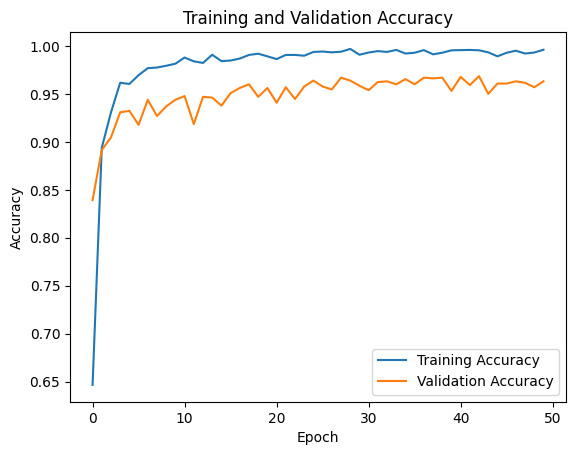

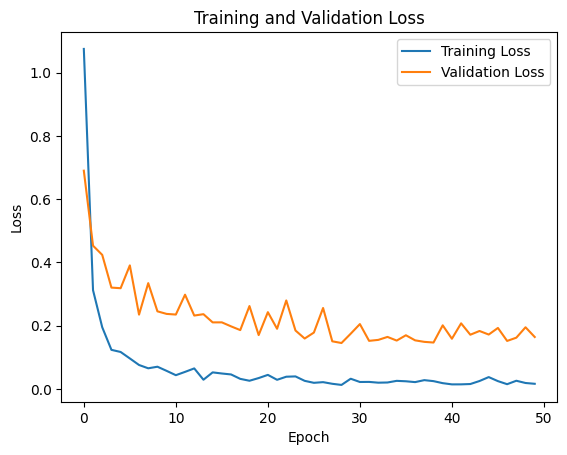

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
